In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3


In [2]:
#Create Database Connection and Table

In [3]:
# Connect to SQLite database (or create it if it doesn't exist)
conn = sqlite3.connect("weather_data.db")
cursor = conn.cursor()

# Create a table for weather data (if it doesn't already exist)
cursor.execute("""
CREATE TABLE IF NOT EXISTS weather (
    year INTEGER PRIMARY KEY,
    avg_temperature REAL,
    rainfall REAL,
    humidity REAL
)
""")


In [4]:
#Insert Sample Weather Data (2000–2020)

In [5]:
# Sample weather data for Pakistan
data = [
    (2000, 23.5, 750, 60), (2001, 23.6, 780, 61), (2002, 23.7, 740, 62), (2003, 23.8, 760, 63), (2004, 23.9, 770, 64),
    (2005, 24.0, 790, 65), (2006, 24.1, 810, 66), (2007, 24.2, 820, 67), (2008, 24.3, 830, 68), (2009, 24.4, 850, 69),
    (2010, 24.5, 860, 70), (2011, 24.6, 870, 71), (2012, 24.7, 880, 72), (2013, 24.8, 890, 73), (2014, 24.9, 900, 74),
    (2015, 25.0, 910, 75), (2016, 25.1, 920, 76), (2017, 25.3, 930, 77), (2018, 25.4, 940, 78), (2019, 25.5, 950, 79),
    (2020, 25.6, 960, 80)
]

# Insert data into the table
cursor.executemany("INSERT OR IGNORE INTO weather VALUES (?, ?, ?, ?)", data)
conn.commit()


In [6]:
#Loading_Data

In [7]:
# Read the data from the database into a DataFrame
df = pd.read_sql("SELECT * FROM weather", conn)


In [8]:
#Plot Average Temperature Trends

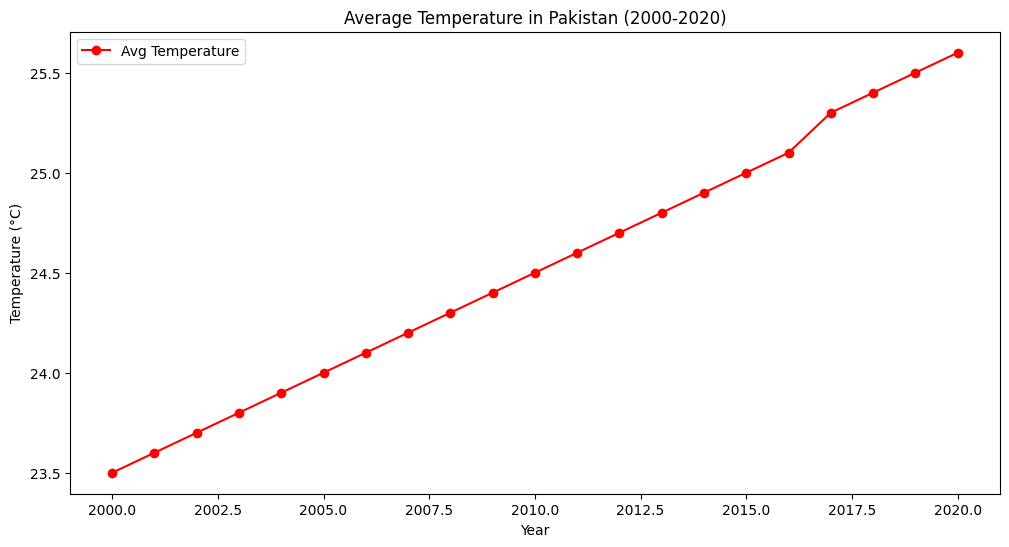

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(df["year"], df["avg_temperature"], marker='o', linestyle='-', color='red', label="Avg Temperature")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.title("Average Temperature in Pakistan (2000-2020)")
plt.legend()
plt.show()


In [10]:
#Plot Rainfall Trends

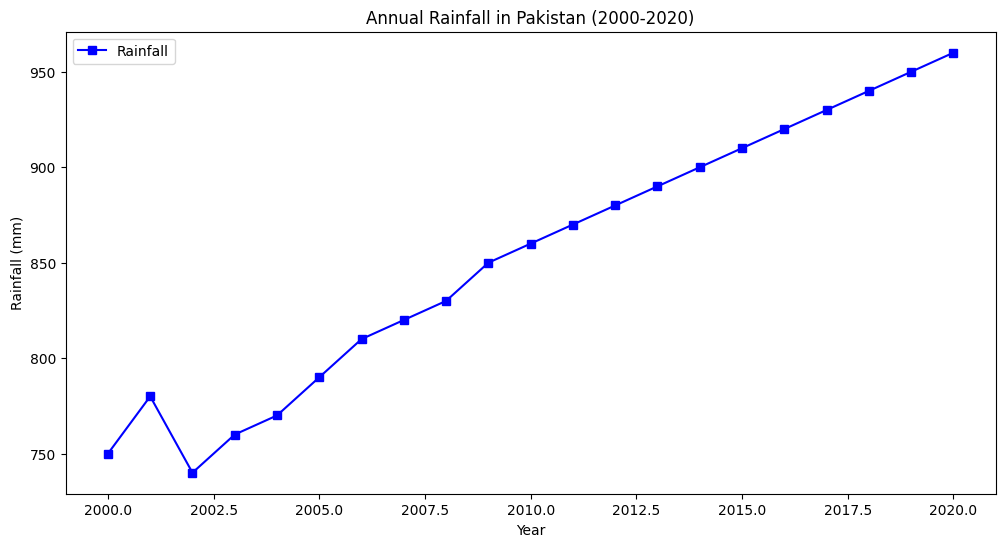

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(df["year"], df["rainfall"], marker='s', linestyle='-', color='blue', label="Rainfall")
plt.xlabel("Year")
plt.ylabel("Rainfall (mm)")
plt.title("Annual Rainfall in Pakistan (2000-2020)")
plt.legend()
plt.show()


In [12]:
#Plot Humidity Trends

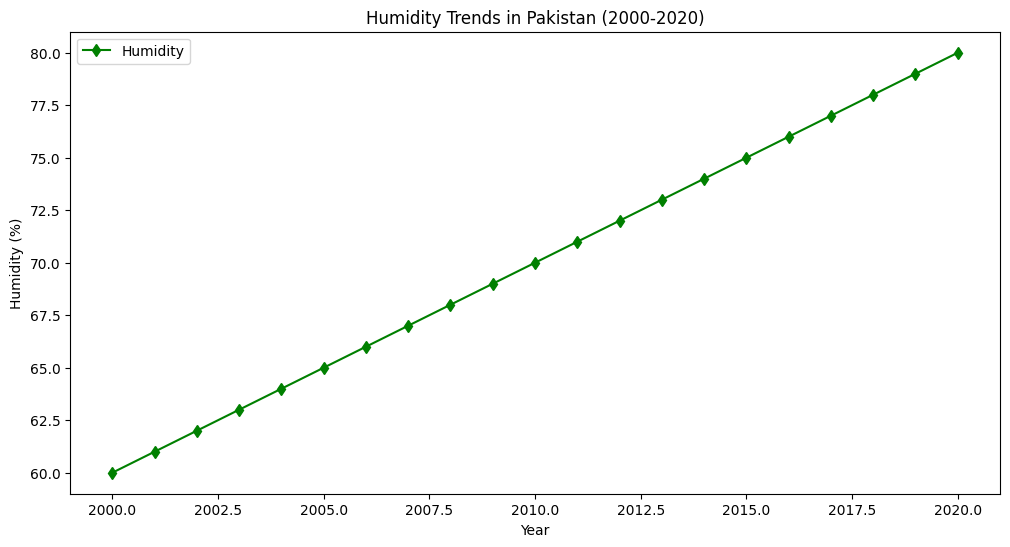

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(df["year"], df["humidity"], marker='d', linestyle='-', color='green', label="Humidity")
plt.xlabel("Year")
plt.ylabel("Humidity (%)")
plt.title("Humidity Trends in Pakistan (2000-2020)")
plt.legend()
plt.show()


In [14]:
#Summary Statistics

In [15]:
print("Weather Data Summary (2000-2020):")
print(df.describe())


Weather Data Summary (2000-2020):
              year  avg_temperature    rainfall   humidity
count    21.000000        21.000000   21.000000  21.000000
mean   2010.000000        24.519048  852.857143  70.000000
std       6.204837         0.648551   70.152894   6.204837
min    2000.000000        23.500000  740.000000  60.000000
25%    2005.000000        24.000000  790.000000  65.000000
50%    2010.000000        24.500000  860.000000  70.000000
75%    2015.000000        25.000000  910.000000  75.000000
max    2020.000000        25.600000  960.000000  80.000000


In [16]:
#Close the Database Connection

In [17]:
conn.close()


In [ ]:
#simple Linear Regression model 

In [20]:
from sklearn.linear_model import LinearRegression
import numpy as np


In [ ]:
#Temprature_Predicting_forecast for the next 20 years (2021–2040)

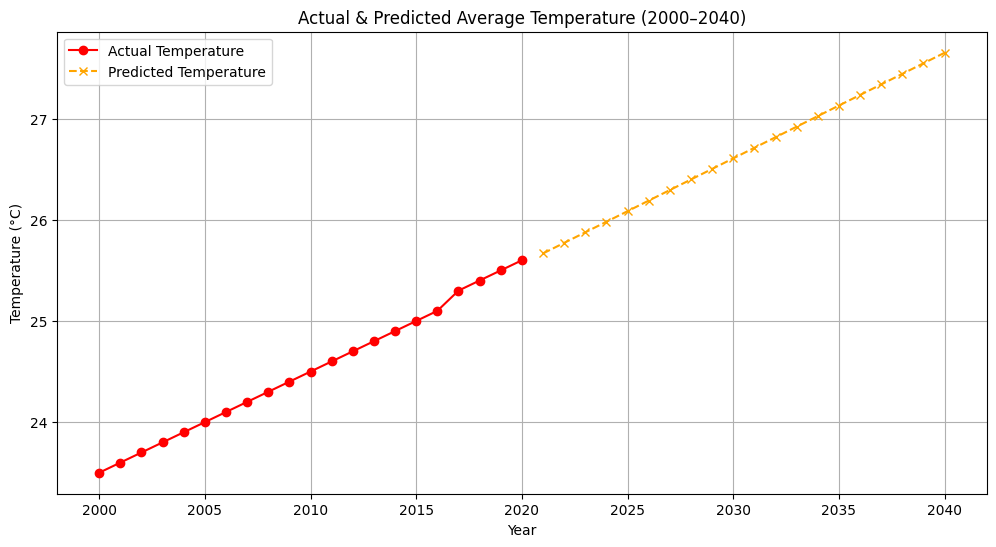

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
from sklearn.linear_model import LinearRegression
import numpy as np

# Connect to the database and load the data
conn = sqlite3.connect("weather_data.db")
df = pd.read_sql("SELECT * FROM weather", conn)

# Prepare data for prediction
X = df[["year"]]  # Feature
y_temp = df["avg_temperature"]  # Target

# Train Linear Regression Model
model_temp = LinearRegression()
model_temp.fit(X, y_temp)

# Predict future temperatures for 2021–2040
future_years = pd.DataFrame({"year": np.arange(2021, 2041)})
future_temp = model_temp.predict(future_years)

# Combine past and future predictions
future_df = future_years.copy()
future_df["avg_temperature"] = future_temp
combined_temp_df = pd.concat([df[["year", "avg_temperature"]], future_df], ignore_index=True)

# Plot actual + predicted temperatures
plt.figure(figsize=(12, 6))
plt.plot(df["year"], df["avg_temperature"], marker='o', label="Actual Temperature", color="red")
plt.plot(future_years["year"], future_temp, marker='x', linestyle='--', label="Predicted Temperature", color="orange")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.title("Actual & Predicted Average Temperature (2000–2040)")
plt.legend()
plt.grid(True)
plt.show()

# Close the connection
conn.close()


In [ ]:
#Rainfall Prediction & Plotting (2000–2040)

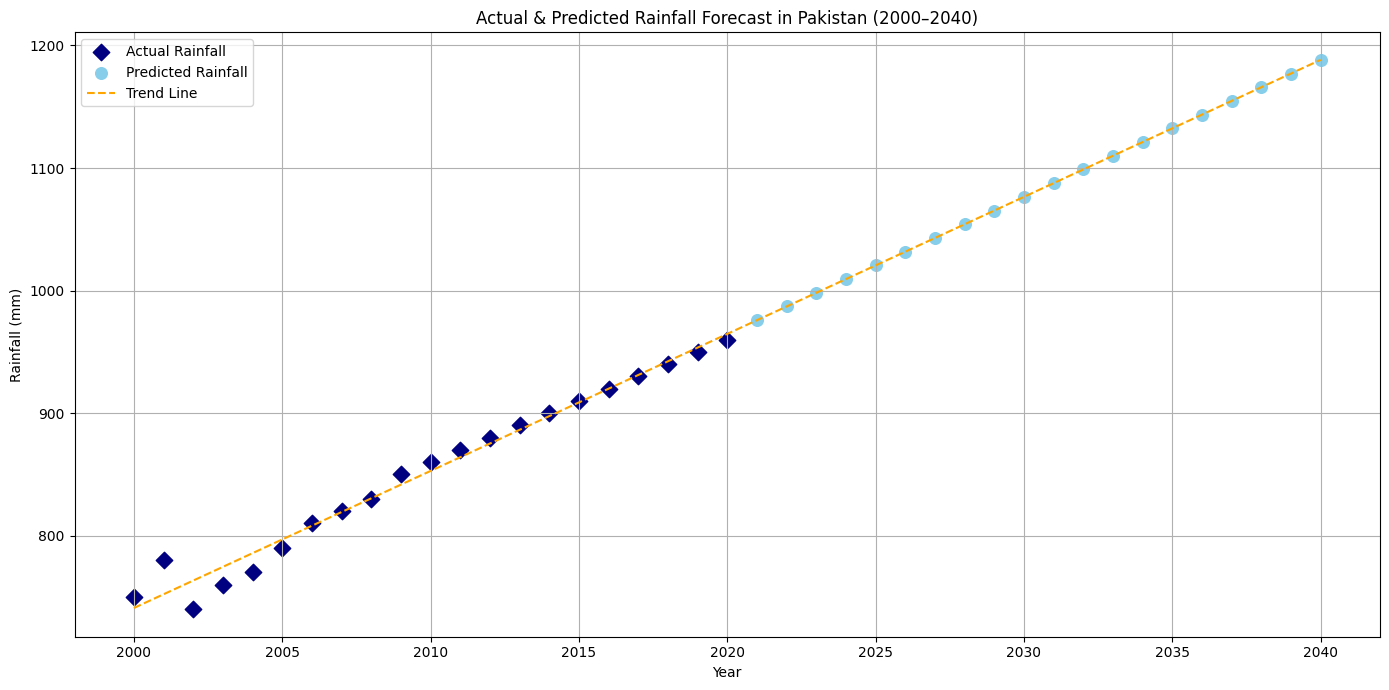

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
from sklearn.linear_model import LinearRegression
import numpy as np

# Connect to the database and load the data
conn = sqlite3.connect("weather_data.db")
df = pd.read_sql("SELECT * FROM weather", conn)

# Prepare data
X = df[["year"]]
y_rain = df["rainfall"]

# Train model
model_rain = LinearRegression()
model_rain.fit(X, y_rain)

# Predict future
future_years = pd.DataFrame({"year": np.arange(2021, 2041)})
future_rain = model_rain.predict(future_years)

# Combine data
future_df = future_years.copy()
future_df["rainfall"] = future_rain

# Scatter plot
plt.figure(figsize=(14, 7))
plt.scatter(df["year"], df["rainfall"], color="navy", label="Actual Rainfall",marker='D', s=70)
plt.scatter(future_df["year"], future_df["rainfall"], color="skyblue", label="Predicted Rainfall", marker='o', s=70)

# Add regression trendline
all_years = pd.concat([df[["year"]], future_years])
predicted_all = model_rain.predict(all_years)
plt.plot(all_years["year"], predicted_all, linestyle="--", color="orange", label="Trend Line")

plt.xlabel("Year")
plt.ylabel("Rainfall (mm)")
plt.title("Actual & Predicted Rainfall Forecast in Pakistan (2000–2040)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Close DB
conn.close()


In [32]:
#Humidity Prediction (2000–2040) 

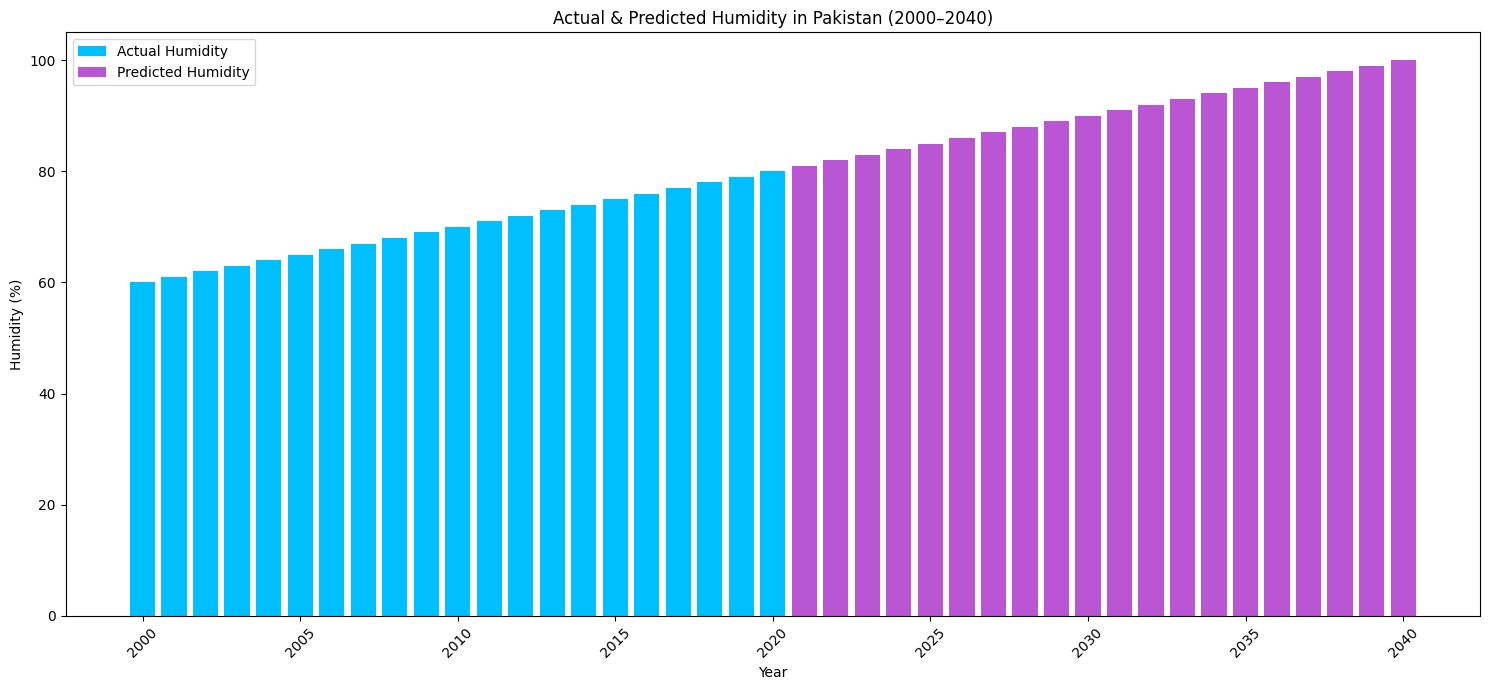

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
from sklearn.linear_model import LinearRegression
import numpy as np

# Connect to the database and load the data
conn = sqlite3.connect("weather_data.db")
df = pd.read_sql("SELECT * FROM weather", conn)

# Prepare data for prediction
X = df[["year"]]
y_humidity = df["humidity"]

# Train Linear Regression Model
model_humidity = LinearRegression()
model_humidity.fit(X, y_humidity)

# Predict humidity for 2021–2040
future_years = pd.DataFrame({"year": np.arange(2021, 2041)})
future_humidity = model_humidity.predict(future_years)

# Combine past and future predictions
future_hum_df = future_years.copy()
future_hum_df["humidity"] = future_humidity
combined_hum_df = pd.concat([df[["year", "humidity"]], future_hum_df], ignore_index=True)

# Bar plot for actual and predicted humidity
plt.figure(figsize=(15, 7))
plt.bar(df["year"], df["humidity"], color="deepskyblue", label="Actual Humidity")
plt.bar(future_years["year"], future_humidity, color="mediumorchid", label="Predicted Humidity")
plt.xlabel("Year")
plt.ylabel("Humidity (%)")
plt.title("Actual & Predicted Humidity in Pakistan (2000–2040)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Close the connection
conn.close()


In [40]:
import os
print(os.getcwd())


C:\Users\M.KAMRAN
